In [58]:
from datetime import date, datetime as dt

import pandas as pd

from news_vec.db import session, Title

In [10]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import altair as alt
import seaborn as sns

mpl.style.use('seaborn-muted')
sns.set(style="whitegrid")

%matplotlib inline

In [2]:
Title.query.count()

2016192

buzzfeed.com


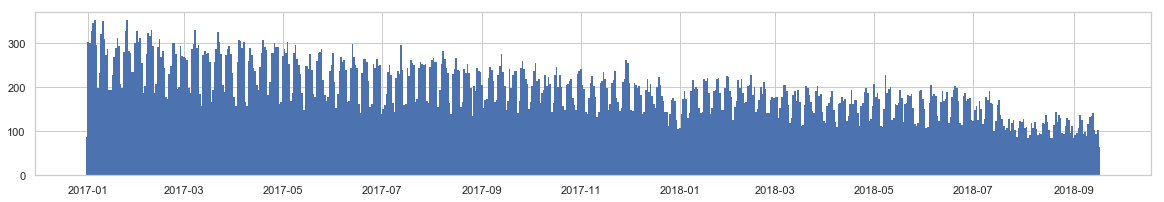

huffingtonpost.com


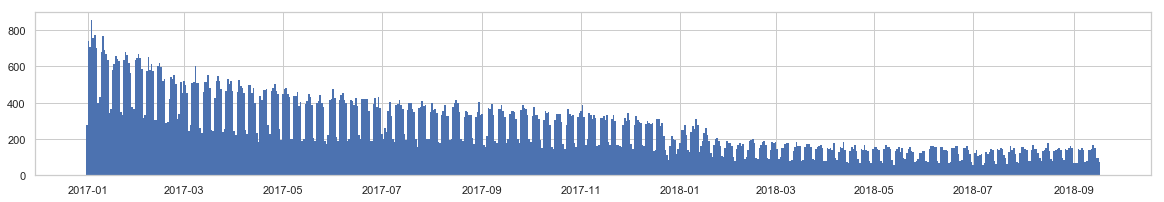

washingtonpost.com


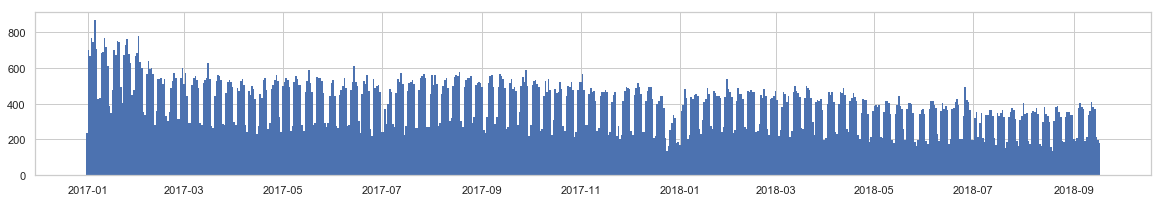

nytimes.com


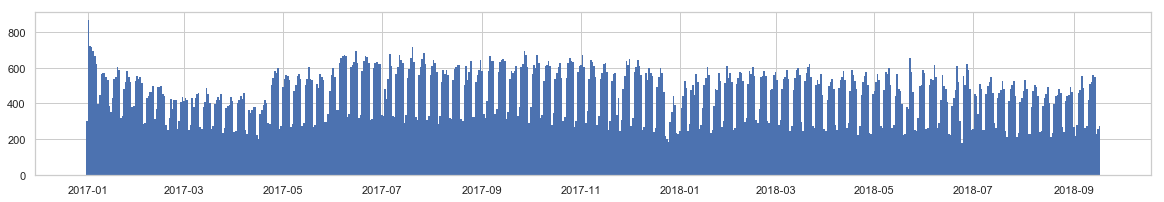

cnn.com


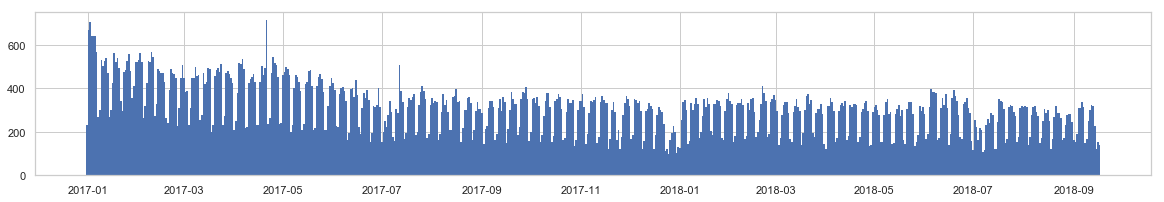

dailycaller.com


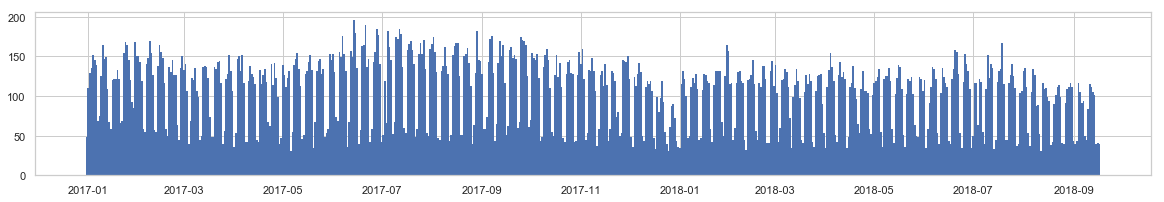

thehill.com


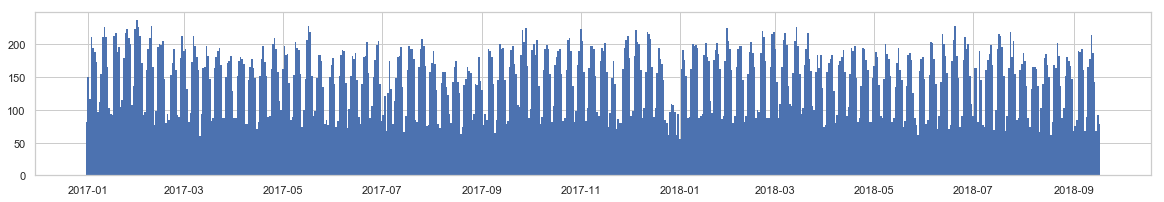

apnews.com


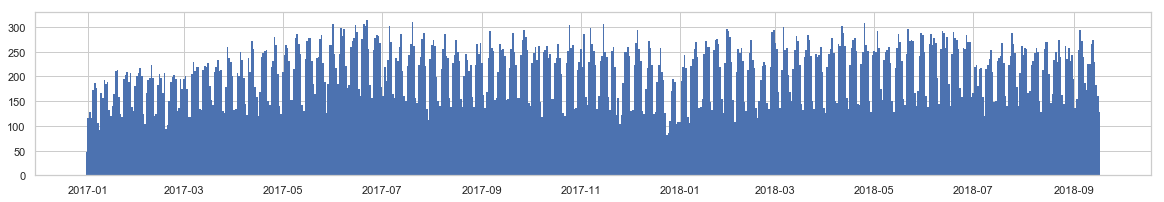

breitbart.com


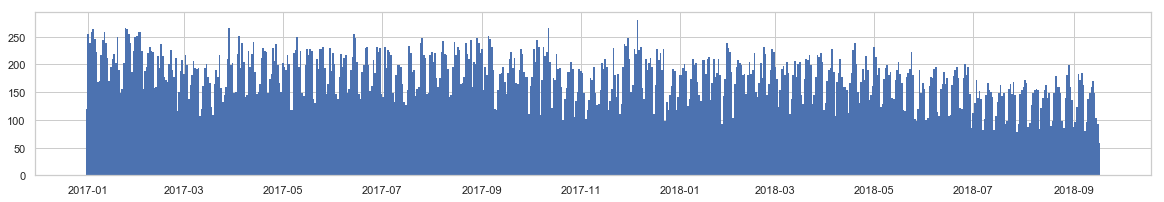

dailykos.com


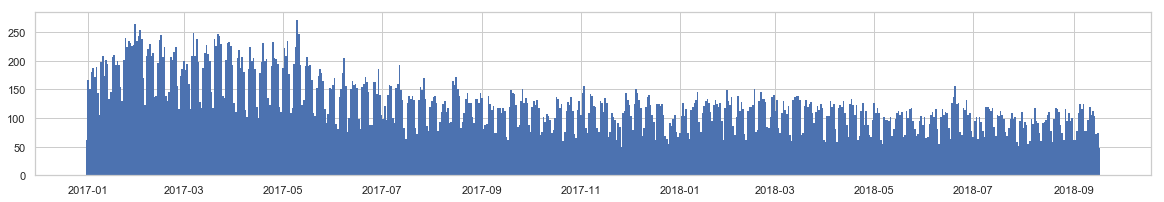

bloomberg.com


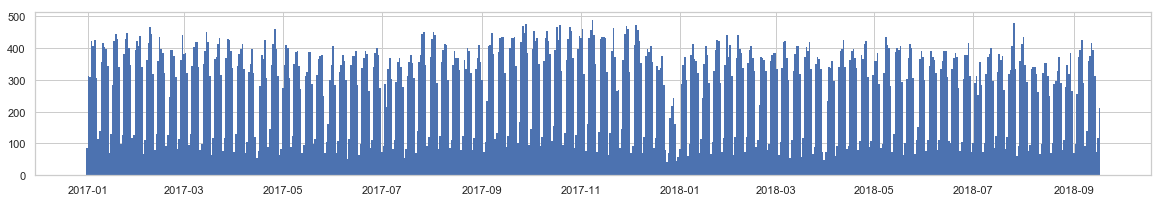

wsj.com


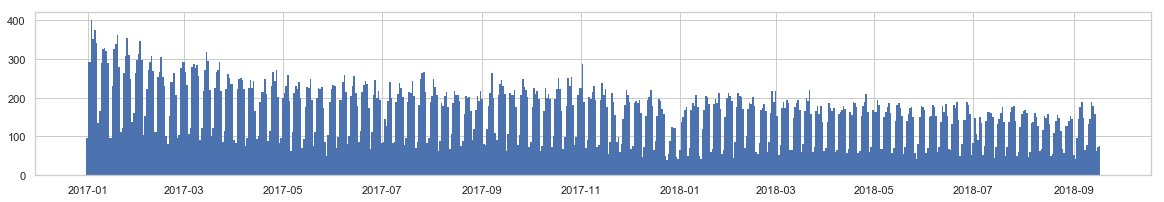

foxnews.com


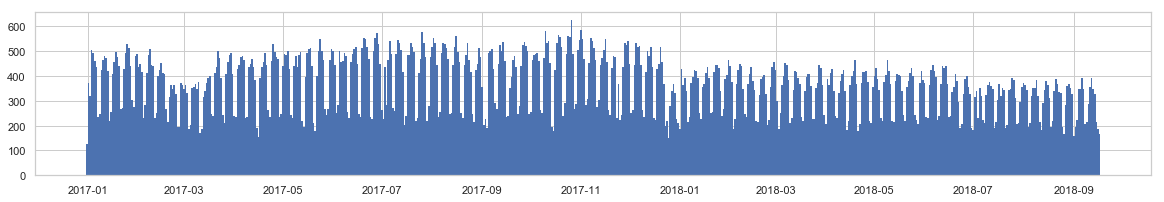

In [53]:
for r in session.query(Title.label).distinct().all():
    
    rows = [dict(r) for r in session.query(Title).filter(Title.label==r[0])]
    df = pd.DataFrame(rows)
    df['date'] = df.timestamp.apply(lambda x: date.fromtimestamp(x))
    
    x = df.date.unique()
    counts = df.groupby('date').sum()['count']
    y = [counts.get(d, 0) for d in x]

    print(r[0])
    plt.figure(figsize=(20,3))
    plt.bar(x, y, linewidth=0, width=1)
    plt.show()

In [61]:
Title.query.filter(Title.label=='huffingtonpost.com').filter(Title.timestamp > dt(2018, 7, 1).timestamp()).count()

9473